In [21]:
import pandas as pd
import numpy as np
from pandas import read_csv

from statsmodels.stats.proportion import proportions_ztest

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.tree import export_graphviz


# 모델튜닝


from scipy import stats
from random import random
from random import uniform
import math
import os
import missingno as msno
import graphviz  # 나무구조 시각화
import matplotlib.font_manager as fm
import warnings
from sklearn.tree import export_graphviz

warnings.filterwarnings('ignore')


path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop = fm.FontProperties(fname=path, size=18).get_name()
matplotlib.rc('font', family=fontprop)
matplotlib.rc('axes', unicode_minus=False)


my_palette = ['#'+hex for hex in "9b5de5 f15bb5 fee440 00bbf9 00f5d4".split(' ')]
my_palette = sns.set_palette(my_palette)
sns.color_palette()

[(0.6078431372549019, 0.36470588235294116, 0.8980392156862745),
 (0.9450980392156862, 0.3568627450980392, 0.7098039215686275),
 (0.996078431372549, 0.8941176470588236, 0.25098039215686274),
 (0.0, 0.7333333333333333, 0.9764705882352941),
 (0.0, 0.9607843137254902, 0.8313725490196079)]

In [22]:
sales = read_csv('01_sales_data2.csv')
customer = read_csv('02_customer_data.csv')
stock = read_csv('03_stock_data.csv')

In [23]:
sales['canceled_quantity'] = np.NaN

In [24]:
sales.loc[sales['quantity'] < 0, 'canceled_quantity'] = sales.loc[sales['quantity'] < 0,'quantity'].apply(lambda x : abs(x))

In [25]:
sales.loc[sales['quantity'] > 0, 'canceled_quantity'] = 0

In [26]:
sales['canceled'] = np.NaN

In [27]:
sales.loc[sales['quantity'] < 0, 'canceled'] = 1

In [28]:
sales.loc[sales['quantity'] > 0, 'canceled'] = 0

In [29]:
sales.loc[sales['canceled'] == 1,'quantity'] = 0

In [30]:
sales[sales['canceled'] == 1]

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,canceled_quantity,canceled
68,C540006,21306,SET/4 DAISY MIRROR MAGNETS,0,2021-01-04,2.10,E14606,-2.10,1.0,1.0
69,C540006,84352,SILVER CHRISTMAS TREE BAUBLE STAND,0,2021-01-04,16.95,E14606,-16.95,1.0,1.0
70,C540006,22423,REGENCY CAKESTAND 3 TIER,0,2021-01-04,12.75,E14606,-12.75,1.0,1.0
71,C540007,21055,TOOL BOX SOFT TOY,0,2021-01-04,8.95,E15379,-53.70,6.0,1.0
72,C540007,22274,FELTCRAFT DOLL EMILY,0,2021-01-04,2.95,E15379,-17.70,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...
258312,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,0,2021-12-09,0.83,E14397,-9.13,11.0,1.0
258360,C581499,M,Manual,0,2021-12-09,224.69,E15498,-224.69,1.0,1.0
258527,C581568,21258,VICTORIAN SEWING BOX LARGE,0,2021-12-09,10.95,E15311,-54.75,5.0,1.0
258528,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,0,2021-12-09,1.25,E17315,-1.25,1.0,1.0


In [31]:
sales_customer = pd.merge(sales, customer, on = 'customer_id')

In [32]:
sales_customer

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,canceled_quantity,canceled,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.50,0.0,0.0,Honolulu,HI,339,156,small,sightseeing,other
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.50,0.0,0.0,Honolulu,HI,339,156,small,sightseeing,other
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.50,0.0,0.0,Honolulu,HI,339,156,small,sightseeing,other
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.50,0.0,0.0,Honolulu,HI,339,156,small,sightseeing,other
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.50,0.0,0.0,Honolulu,HI,339,156,small,sightseeing,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282637,581501,84356,POMPOM CURTAIN,12,2021-12-09,1.95,E12985,23.40,0.0,0.0,Los Angeles,CA,3985,1216,middle,metro,west
282638,581501,85173,SET/6 FROG PRINCE T-LIGHT CANDLES,12,2021-12-09,0.79,E12985,9.48,0.0,0.0,Los Angeles,CA,3985,1216,middle,metro,west
282639,581501,21731,RED TOADSTOOL LED NIGHT LIGHT,24,2021-12-09,1.65,E12985,39.60,0.0,0.0,Los Angeles,CA,3985,1216,middle,metro,west
282640,581501,23480,MINI LIGHTS WOODLAND MUSHROOMS,8,2021-12-09,3.75,E12985,30.00,0.0,0.0,Los Angeles,CA,3985,1216,middle,metro,west


In [34]:
category = read_csv('category.csv')
temp = pd.merge(sales_customer, category, on = 'product_name')[pd.merge(sales_customer, category, on = 'product_name').quantity < 30000].copy()

In [35]:
test = temp[temp.quantity < 30000].copy()

In [36]:
test = test[test['canceled_quantity'] < 30000]

In [37]:
test[test['canceled_quantity'] > 30000]

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,canceled_quantity,canceled,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,Unnamed: 0,stock_type,category


In [38]:
test.groupby('category',as_index = False)['canceled_quantity'].sum()

,category,canceled_quantity
0,Apparel,0.0
1,"Baby, Kids & Maternity",302.0
2,"Bags, Luggage & Accessories",5794.0
3,Cell Phones & Accessories,0.0
4,Christmas,696.0
5,Discount,1174.0
6,Easter,269.0
7,Fashion Accessories,0.0
8,Fashoin Accessories,22.0
9,Hair Products,140.0


In [39]:
test.groupby('category',as_index = False)['quantity'].sum()

,category,quantity
0,Apparel,9561
1,"Baby, Kids & Maternity",18710
2,"Bags, Luggage & Accessories",288110
3,Cell Phones & Accessories,8
4,Christmas,83268
5,Discount,0
6,Easter,9282
7,Fashion Accessories,141
8,Fashoin Accessories,706
9,Hair Products,7643


In [40]:
cancel_ratio = pd.DataFrame()
cancel_ratio['category'] = test.groupby('category',as_index = False)['quantity'].sum()['category']

In [41]:
cancel_ratio['canceled_quantity'] = test.groupby('category',as_index = False)['canceled_quantity'].sum()['canceled_quantity']

In [42]:
cancel_ratio['quantity'] = test.groupby('category',as_index = False)['quantity'].sum()['quantity']

In [43]:
cancel_ratio['cancel_ratio'] = cancel_ratio['canceled_quantity'] / cancel_ratio['quantity']

In [44]:
cancel_ratio.query('cancel_ratio < 0.03 and cancel_ratio > 0.00 and quantity > 50000')

,category,canceled_quantity,quantity,cancel_ratio
2,"Bags, Luggage & Accessories",5794.0,288110,0.020110
4,Christmas,696.0,83268,0.008359
12,Home & Garden,36216.0,1782256,0.020320
16,Lights & Lighting,5495.0,202798,0.027096
18,Office & School & Business & Industrial,2179.0,130680,0.016674
20,Toys & Gifts,586.0,70320,0.008333
22,"Wedding , Party & Events",887.0,96109,0.009229


In [45]:
n_obs = [70320	,202798] #toys&gift / Lights & Lighting 
count = [586,5495]

In [46]:
proportions_ztest(count, n_obs)

(-29.058025496238784, 1.2184169580472398e-185)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Bags, Luggage & Accessories'),
  Text(1, 0, 'Christmas'),
  Text(2, 0, 'Home & Garden'),
  Text(3, 0, 'Lights & Lighting'),
  Text(4, 0, 'Office & School & Business & Industrial'),
  Text(5, 0, 'Toys & Gifts'),
  Text(6, 0, 'Wedding , Party & Events')])

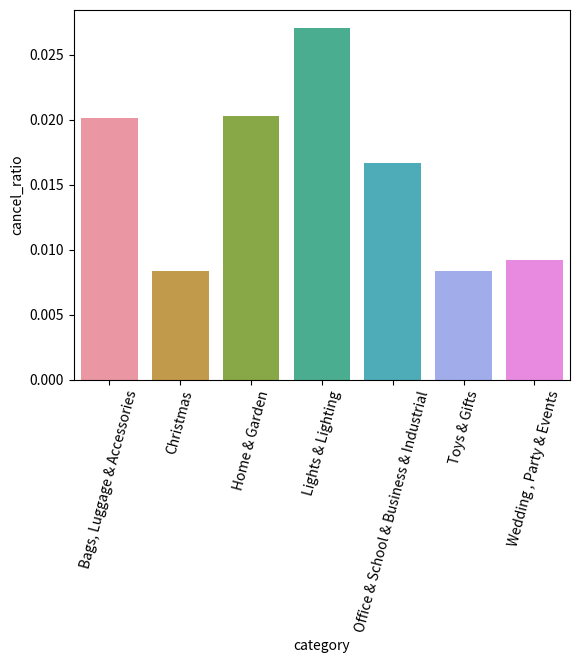

In [47]:
sns.barplot(cancel_ratio.query('cancel_ratio < 0.03 and cancel_ratio > 0.005 and quantity > 50000'),x = 'category', y = 'cancel_ratio')
plt.xticks(rotation = 75)

In [48]:
(test.loc[test['category'] == 'Lights & Lighting'].groupby('product_name',as_index=False)['canceled_quantity'].sum()).sort_values(by = 'canceled_quantity',ascending=False)

,product_name,canceled_quantity
119,WHITE HANGING HEART T-LIGHT HOLDER,2043.0
25,COLOUR GLASS. STAR T-LIGHT HOLDER,1166.0
115,VICTORIAN GLASS HANGING T-LIGHT,386.0
122,WHITE TALL PORCELAIN T-LIGHT HOLDER,292.0
106,T-LIGHT GLASS FLUTED ANTIQUE,166.0
...,...,...
59,MINI HIGHLIGHTER PENS,0.0
57,LILAC GAUZE BUTTERFLY LAMPSHADE,0.0
56,LIGHTHOUSE PRINTED METAL SIGN,0.0
55,LIGHT PINK FLOCK GLASS CANDLEHOLDER,0.0


In [49]:
(test.loc[test['category'] == 'Lights & Lighting'].groupby('product_name',as_index=False)['quantity'].sum()).sort_values(by = 'quantity',ascending=False)

,product_name,quantity
119,WHITE HANGING HEART T-LIGHT HOLDER,31102
115,VICTORIAN GLASS HANGING T-LIGHT,20014
24,COLOUR GLASS T-LIGHT HOLDER HANGING,14103
42,HANGING JAM JAR T-LIGHT HOLDER,9627
40,HANGING HEART JAR T-LIGHT HOLDER,9326
...,...,...
118,WHITE BEADED GARLAND STRING 20LIGHT,5
114,UBO-LIGHT TRIOBASE PURPLE,4
51,IVORY PANTRY HANGING LAMP,2
4,ANTIQUE LILY FAIRY LIGHTS,0


In [50]:
light = pd.merge((test.loc[test['category'] == 'Lights & Lighting'].groupby('product_name',as_index=False)['canceled_quantity'].sum()).sort_values(by = 'canceled_quantity',ascending=False),(test.loc[test['category'] == 'Lights & Lighting'].groupby('product_name',as_index=False)['quantity'].sum()).sort_values(by = 'quantity',ascending=False),on='product_name')

In [51]:
light

,product_name,canceled_quantity,quantity
0,WHITE HANGING HEART T-LIGHT HOLDER,2043.0,31102
1,COLOUR GLASS. STAR T-LIGHT HOLDER,1166.0,5616
2,VICTORIAN GLASS HANGING T-LIGHT,386.0,20014
3,WHITE TALL PORCELAIN T-LIGHT HOLDER,292.0,560
4,T-LIGHT GLASS FLUTED ANTIQUE,166.0,6528
...,...,...,...
125,MINI HIGHLIGHTER PENS,0.0,600
126,LILAC GAUZE BUTTERFLY LAMPSHADE,0.0,24
127,LIGHTHOUSE PRINTED METAL SIGN,0.0,6
128,LIGHT PINK FLOCK GLASS CANDLEHOLDER,0.0,36


In [52]:
light['ratio'] = light['canceled_quantity'] / light['quantity']

In [53]:
light.sort_values(by = 'ratio',ascending = False).head(30)

,product_name,canceled_quantity,quantity,ratio
67,FLAMINGO LIGHTS,1.0,0,inf
54,ANTIQUE LILY FAIRY LIGHTS,3.0,0,inf
41,PINK CHERRY LIGHTS,8.0,8,1.000000
13,BLUE VOILE LAMPSHADE,48.0,86,0.558140
3,WHITE TALL PORCELAIN T-LIGHT HOLDER,292.0,560,0.521429
42,BLACK CHERRY LIGHTS,8.0,16,0.500000
16,HANGING RIDGE GLASS T-LIGHT HOLDER,36.0,72,0.500000
23,PAPER LANTERN 5 POINT STAR MOON,20.0,61,0.327869
1,COLOUR GLASS. STAR T-LIGHT HOLDER,1166.0,5616,0.207621
32,HEART T-LIGHT HOLDER,13.0,86,0.151163


In [54]:
sales['unit_price'].mean()

3.324527225253147

In [55]:
test

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,canceled_quantity,canceled,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,Unnamed: 0,stock_type,category
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.50,0.0,0.0,Honolulu,HI,339,156,small,sightseeing,other,0,consignment,"Bags, Luggage & Accessories"
1,560915,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13313,20.80,0.0,0.0,Honolulu,HI,339,156,small,sightseeing,other,0,consignment,"Bags, Luggage & Accessories"
2,545602,22386,JUMBO BAG PINK POLKADOT,1,2021-03-04,1.95,E17315,1.95,0.0,0.0,New York,NY,8177,778,big,metro,east,0,consignment,"Bags, Luggage & Accessories"
3,548150,22386,JUMBO BAG PINK POLKADOT,1,2021-03-29,1.95,E17315,1.95,0.0,0.0,New York,NY,8177,778,big,metro,east,0,consignment,"Bags, Luggage & Accessories"
4,554090,22386,JUMBO BAG PINK POLKADOT,2,2021-05-22,2.08,E17315,4.16,0.0,0.0,New York,NY,8177,778,big,metro,east,0,consignment,"Bags, Luggage & Accessories"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230639,570241,90189A,SILVER 2 STRAND NECKLACE-LEAF CHARM,1,2021-10-09,7.50,E14801,7.50,0.0,0.0,New York,NY,8177,778,big,metro,east,3574,consignment,"Bags, Luggage & Accessories"
230640,570241,90054,CRACKED GLAZE EARRINGS RED,1,2021-10-09,2.55,E14801,2.55,0.0,0.0,New York,NY,8177,778,big,metro,east,3575,consignment,"Bags, Luggage & Accessories"
230641,570241,90188,DROP EARRINGS W FLOWER & LEAF,1,2021-10-09,2.55,E14801,2.55,0.0,0.0,New York,NY,8177,778,big,metro,east,3576,consignment,"Bags, Luggage & Accessories"
230642,570241,90071,RUBY GLASS CLUSTER EARRINGS,1,2021-10-09,1.25,E14801,1.25,0.0,0.0,New York,NY,8177,778,big,metro,east,3578,consignment,Home & Garden


In [56]:
pop_size = test.groupby('pop_size',as_index = False)['pop_thousand'].mean()

In [57]:
sales_size = test.groupby('pop_size', as_index=False )['sales'].sum()

In [58]:
sales_size

,pop_size,sales
0,big,1304637.282
1,middle,2951962.352
2,small,229481.600


In [59]:
pop_sales = pd.merge(sales_size, pop_size, on='pop_size')

In [60]:
pop_sales['pop_thousand'] = pop_sales['pop_thousand'].astype('int32')

In [61]:
pop_sales['pop_thousand'] = pop_sales['pop_thousand'].apply(lambda x : x * 1000)

In [62]:
pop_sales

,pop_size,sales,pop_thousand
0,big,1304637.282,8177000
1,middle,2951962.352,2346000
2,small,229481.600,555000


In [63]:
pop_sales['sales_per_person'] = pop_sales['sales'] / pop_sales['pop_thousand']

In [64]:
pop_sales.T

,0,1,2
pop_size,big,middle,small
sales,1304637.282,2951962.352,229481.6
pop_thousand,8177000,2346000,555000
sales_per_person,0.15955,1.258296,0.41348


In [65]:
test

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,canceled_quantity,canceled,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,Unnamed: 0,stock_type,category
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.50,0.0,0.0,Honolulu,HI,339,156,small,sightseeing,other,0,consignment,"Bags, Luggage & Accessories"
1,560915,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13313,20.80,0.0,0.0,Honolulu,HI,339,156,small,sightseeing,other,0,consignment,"Bags, Luggage & Accessories"
2,545602,22386,JUMBO BAG PINK POLKADOT,1,2021-03-04,1.95,E17315,1.95,0.0,0.0,New York,NY,8177,778,big,metro,east,0,consignment,"Bags, Luggage & Accessories"
3,548150,22386,JUMBO BAG PINK POLKADOT,1,2021-03-29,1.95,E17315,1.95,0.0,0.0,New York,NY,8177,778,big,metro,east,0,consignment,"Bags, Luggage & Accessories"
4,554090,22386,JUMBO BAG PINK POLKADOT,2,2021-05-22,2.08,E17315,4.16,0.0,0.0,New York,NY,8177,778,big,metro,east,0,consignment,"Bags, Luggage & Accessories"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230639,570241,90189A,SILVER 2 STRAND NECKLACE-LEAF CHARM,1,2021-10-09,7.50,E14801,7.50,0.0,0.0,New York,NY,8177,778,big,metro,east,3574,consignment,"Bags, Luggage & Accessories"
230640,570241,90054,CRACKED GLAZE EARRINGS RED,1,2021-10-09,2.55,E14801,2.55,0.0,0.0,New York,NY,8177,778,big,metro,east,3575,consignment,"Bags, Luggage & Accessories"
230641,570241,90188,DROP EARRINGS W FLOWER & LEAF,1,2021-10-09,2.55,E14801,2.55,0.0,0.0,New York,NY,8177,778,big,metro,east,3576,consignment,"Bags, Luggage & Accessories"
230642,570241,90071,RUBY GLASS CLUSTER EARRINGS,1,2021-10-09,1.25,E14801,1.25,0.0,0.0,New York,NY,8177,778,big,metro,east,3578,consignment,Home & Garden


In [66]:
importante = cancel_ratio.query('cancel_ratio < 0.03 and cancel_ratio > 0.005 and quantity > 50000')

In [67]:
customer_category = test.groupby(['customer_id','category'], as_index = False)['quantity'].sum()

In [68]:
customer_category

,customer_id,category,quantity
0,E12747,"Bags, Luggage & Accessories",80
1,E12747,Home & Garden,553
2,E12747,Lights & Lighting,180
3,E12748,"Baby, Kids & Maternity",33
4,E12748,"Bags, Luggage & Accessories",715
...,...,...,...
16684,E18287,"Bags, Luggage & Accessories",6
16685,E18287,Home & Garden,344
16686,E18287,Lights & Lighting,18
16687,E18287,Office & School & Business & Industrial,60


In [69]:
customer_category['category'].values

array(['Bags, Luggage & Accessories', 'Home & Garden',
       'Lights & Lighting', ..., 'Lights & Lighting',
       'Office & School & Business & Industrial', 'Toys & Gifts'],
      dtype=object)

In [70]:
cc =customer

In [71]:
for cate in customer_category['category'].unique():
    cc[cate] = np.NaN

In [72]:
customer['customer_id'].values
customer['customer_id'].values

array(['E13313', 'E18097', 'E16656', ..., 'E14569', 'E16688', 'E12985'],
      dtype=object)

In [73]:
for i in range(customer.shape[0]) :
    cc.loc[cc['customer_id'] == customer_category['customer_id'].values[i], customer_category['category'].values[i]] = customer_category['quantity'].values[i]

In [74]:
cc.fillna(0,inplace=True)

In [75]:
cc.to_csv('classification.csv')

In [76]:
cc

,customer_id,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,"Bags, Luggage & Accessories",Home & Garden,...,Sports & Outdoors,Toys & Gifts,Watches,"Wedding , Party & Events",Fashion Accessories,Discount,Apparel,Jewelry,Headphones & Earphones,Cell Phones & Accessories
0,E13313,Honolulu,HI,339,156,small,sightseeing,other,231.0,234.0,...,0.0,4.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1,E18097,Houston,TX,2325,1658,middle,other,south,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,E16656,San Jose,CA,1003,461,middle,sightseeing,west,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,E16875,Phoenix,AZ,1759,1341,middle,other,west,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,E13094,Phoenix,AZ,1759,1341,middle,other,west,0.0,240.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3453,E14698,Las Vegas,NV,675,367,small,sightseeing,west,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3454,E13298,San Diego,CA,1429,844,middle,sightseeing,west,0.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3455,E14569,New York,NY,8177,778,big,metro,east,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3456,E16688,Phoenix,AZ,1759,1341,middle,other,west,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
canceled = test.groupby('customer_id',as_index = False)['canceled'].max()

In [78]:
customer

,customer_id,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,"Bags, Luggage & Accessories",Home & Garden,...,Sports & Outdoors,Toys & Gifts,Watches,"Wedding , Party & Events",Fashion Accessories,Discount,Apparel,Jewelry,Headphones & Earphones,Cell Phones & Accessories
0,E13313,Honolulu,HI,339,156,small,sightseeing,other,231.0,234.0,...,0.0,4.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1,E18097,Houston,TX,2325,1658,middle,other,south,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,E16656,San Jose,CA,1003,461,middle,sightseeing,west,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,E16875,Phoenix,AZ,1759,1341,middle,other,west,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,E13094,Phoenix,AZ,1759,1341,middle,other,west,0.0,240.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3453,E14698,Las Vegas,NV,675,367,small,sightseeing,west,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3454,E13298,San Diego,CA,1429,844,middle,sightseeing,west,0.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3455,E14569,New York,NY,8177,778,big,metro,east,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3456,E16688,Phoenix,AZ,1759,1341,middle,other,west,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
classification = pd.merge(cc, canceled, on= 'customer_id')

In [80]:
classification.to_csv('classification.csv')

In [81]:
light

,product_name,canceled_quantity,quantity,ratio
0,WHITE HANGING HEART T-LIGHT HOLDER,2043.0,31102,0.065687
1,COLOUR GLASS. STAR T-LIGHT HOLDER,1166.0,5616,0.207621
2,VICTORIAN GLASS HANGING T-LIGHT,386.0,20014,0.019286
3,WHITE TALL PORCELAIN T-LIGHT HOLDER,292.0,560,0.521429
4,T-LIGHT GLASS FLUTED ANTIQUE,166.0,6528,0.025429
...,...,...,...,...
125,MINI HIGHLIGHTER PENS,0.0,600,0.000000
126,LILAC GAUZE BUTTERFLY LAMPSHADE,0.0,24,0.000000
127,LIGHTHOUSE PRINTED METAL SIGN,0.0,6,0.000000
128,LIGHT PINK FLOCK GLASS CANDLEHOLDER,0.0,36,0.000000


In [82]:
light = light.sort_values(by='ratio',ascending=False)[3:]

In [83]:
light['ratio'].values[:7]

array([0.55813953, 0.52142857, 0.5       , 0.5       , 0.32786885,
       0.20762108, 0.15116279])

In [84]:
problem = light[:7]

In [85]:
problem.drop(['canceled_quantity', 'quantity'], axis = 1,inplace = True)

In [86]:
problem.T

,13,3,42,16,23,1,32
product_name,BLUE VOILE LAMPSHADE,WHITE TALL PORCELAIN T-LIGHT HOLDER,BLACK CHERRY LIGHTS,HANGING RIDGE GLASS T-LIGHT HOLDER,PAPER LANTERN 5 POINT STAR MOON,COLOUR GLASS. STAR T-LIGHT HOLDER,HEART T-LIGHT HOLDER
ratio,0.55814,0.521429,0.5,0.5,0.327869,0.207621,0.151163


In [87]:
q = test.groupby('category',as_index=False)['quantity'].sum().sort_values(by = 'quantity', ascending = False)

In [88]:
cq = test.groupby('category',as_index=False)['canceled_quantity'].sum().sort_values(by = 'canceled_quantity', ascending = False)

In [89]:
res = pd.merge(cq,q, on='category')

In [90]:
res['ratio'] = res['canceled_quantity'] / res['quantity']

In [91]:
res.sort_values(by = 'ratio',ascending = False)[3:8].T

,11,13,2,9,15
category,Easter,Household Appliances,Lights & Lighting,Watches,Sports & Outdoors
canceled_quantity,269.0,53.0,5495.0,520.0,30.0
quantity,9282,1855,202798,20102,1349
ratio,0.028981,0.028571,0.027096,0.025868,0.022239


In [93]:
sales = read_csv('01_sales_data2.csv')
sales['date'] = pd.to_datetime(sales['date'])

In [94]:
sales.sort_values(by='quantity',ascending=False).head(20)

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales
258284,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2021-12-09,2.08,E16446,168469.60
9607,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2021-01-18,1.04,E12346,77183.60
105340,554868,22197,SMALL POPCORN HOLDER,4300,2021-05-27,0.72,E13135,3096.00
31008,544612,22053,EMPIRE DESIGN ROSETTE,3906,2021-02-22,0.82,E18087,3202.92
145761,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2021-07-19,0.06,E14609,191.16
5851,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2021-01-11,2.10,E15749,6539.40
74725,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2021-04-18,2.10,E15749,6539.40
228545,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2021-11-02,0.32,E16308,960.00
159253,562439,84879,ASSORTED COLOUR BIRD ORNAMENT,2880,2021-08-04,1.45,E12931,4176.00
272869,662439,84879,ASSORTED COLOUR BIRD ORNAMENT,2880,2021-10-29,1.45,E12931,4176.00


(array([18628., 18687., 18748., 18809., 18871., 18932., 18993.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18687.0, 0, '2021-03'),
  Text(18748.0, 0, '2021-05'),
  Text(18809.0, 0, '2021-07'),
  Text(18871.0, 0, '2021-09'),
  Text(18932.0, 0, '2021-11'),
  Text(18993.0, 0, '2022-01')])

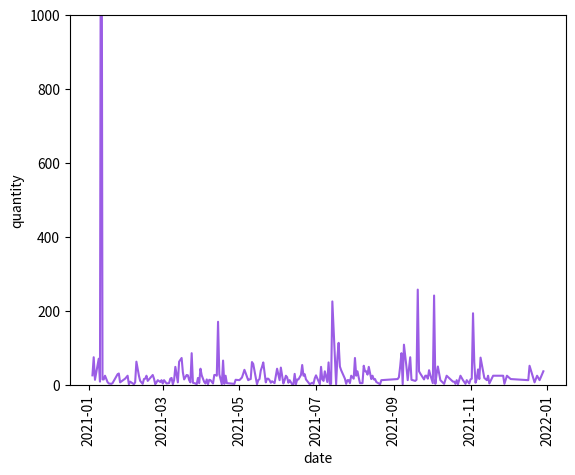

In [95]:
temp = sales[sales['product_name'] == 'GIN + TONIC DIET METAL SIGN'].groupby('date',as_index =False)['quantity'].sum()
sns.lineplot(temp, x ='date', y = 'quantity')
plt.ylim(0,1000)
plt.xticks(rotation=90)

(array([18748., 18779., 18809., 18840., 18871., 18901., 18932., 18962.,
        18993.]),
 [Text(18748.0, 0, '2021-05'),
  Text(18779.0, 0, '2021-06'),
  Text(18809.0, 0, '2021-07'),
  Text(18840.0, 0, '2021-08'),
  Text(18871.0, 0, '2021-09'),
  Text(18901.0, 0, '2021-10'),
  Text(18932.0, 0, '2021-11'),
  Text(18962.0, 0, '2021-12'),
  Text(18993.0, 0, '2022-01')])

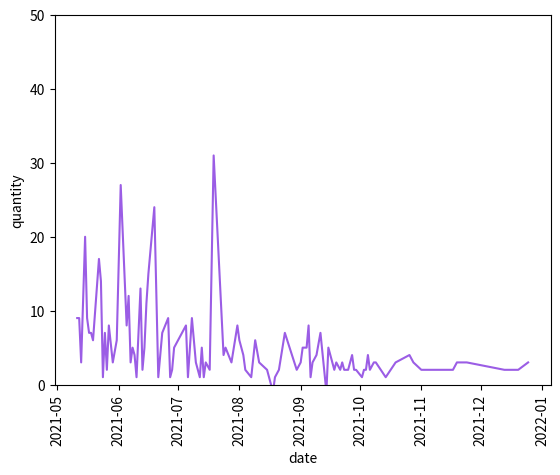

In [96]:
temp = sales[sales['product_name'] == 'ZINC HERB GARDEN CONTAINER'].groupby('date',as_index =False)['quantity'].sum()
sns.lineplot(temp, x ='date', y = 'quantity')
plt.ylim(0,50)
plt.xticks(rotation=90)

In [97]:
test.sort_values(by = 'date')

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,canceled_quantity,canceled,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,Unnamed: 0,stock_type,category
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.50,0.0,0.0,Honolulu,HI,339,156,small,sightseeing,other,0,consignment,"Bags, Luggage & Accessories"
78580,540027,84849B,FAIRY SOAP SOAP HOLDER,12,2021-01-04,1.69,E14210,20.28,0.0,0.0,Las Vegas,NV,675,367,small,sightseeing,west,111,consignment,Home & Garden
78582,540033,84849B,FAIRY SOAP SOAP HOLDER,4,2021-01-04,1.69,E13680,6.76,0.0,0.0,Houston,TX,2325,1658,middle,other,south,111,consignment,Home & Garden
158208,540031,22469,HEART OF WICKER SMALL,6,2021-01-04,1.65,E17975,9.90,0.0,0.0,Houston,TX,2325,1658,middle,other,south,212,consignment,Home & Garden
78615,540014,22494,EMERGENCY FIRST AID TIN,2,2021-01-04,1.25,E14606,2.50,0.0,0.0,San Diego,CA,1429,844,middle,sightseeing,west,112,consignment,Home & Garden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119326,666024,23201,JUMBO BAG ALPHABET,10,2021-12-31,2.08,E13871,20.80,0.0,0.0,Los Angeles,CA,3985,1216,middle,metro,west,2672,consignment,"Bags, Luggage & Accessories"
62122,658539,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2021-12-31,2.55,E16556,15.30,0.0,0.0,New York,NY,8177,778,big,metro,east,964,consignment,Home & Garden
24741,659505,16156S,WRAP PINK FAIRY CAKES,25,2021-12-31,0.42,E16398,10.50,0.0,0.0,San Jose,CA,1003,461,middle,sightseeing,west,274,consignment,Home & Garden
1632,650775,20718,RED RETROSPOT SHOPPER BAG,10,2021-12-31,1.25,E15805,12.50,0.0,0.0,Houston,TX,2325,1658,middle,other,south,4,consignment,"Bags, Luggage & Accessories"


In [98]:
stock[stock['stock_type'] == 'buying'].to_csv('buying.csv')

In [99]:
test

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,canceled_quantity,canceled,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,Unnamed: 0,stock_type,category
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.50,0.0,0.0,Honolulu,HI,339,156,small,sightseeing,other,0,consignment,"Bags, Luggage & Accessories"
1,560915,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13313,20.80,0.0,0.0,Honolulu,HI,339,156,small,sightseeing,other,0,consignment,"Bags, Luggage & Accessories"
2,545602,22386,JUMBO BAG PINK POLKADOT,1,2021-03-04,1.95,E17315,1.95,0.0,0.0,New York,NY,8177,778,big,metro,east,0,consignment,"Bags, Luggage & Accessories"
3,548150,22386,JUMBO BAG PINK POLKADOT,1,2021-03-29,1.95,E17315,1.95,0.0,0.0,New York,NY,8177,778,big,metro,east,0,consignment,"Bags, Luggage & Accessories"
4,554090,22386,JUMBO BAG PINK POLKADOT,2,2021-05-22,2.08,E17315,4.16,0.0,0.0,New York,NY,8177,778,big,metro,east,0,consignment,"Bags, Luggage & Accessories"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230639,570241,90189A,SILVER 2 STRAND NECKLACE-LEAF CHARM,1,2021-10-09,7.50,E14801,7.50,0.0,0.0,New York,NY,8177,778,big,metro,east,3574,consignment,"Bags, Luggage & Accessories"
230640,570241,90054,CRACKED GLAZE EARRINGS RED,1,2021-10-09,2.55,E14801,2.55,0.0,0.0,New York,NY,8177,778,big,metro,east,3575,consignment,"Bags, Luggage & Accessories"
230641,570241,90188,DROP EARRINGS W FLOWER & LEAF,1,2021-10-09,2.55,E14801,2.55,0.0,0.0,New York,NY,8177,778,big,metro,east,3576,consignment,"Bags, Luggage & Accessories"
230642,570241,90071,RUBY GLASS CLUSTER EARRINGS,1,2021-10-09,1.25,E14801,1.25,0.0,0.0,New York,NY,8177,778,big,metro,east,3578,consignment,Home & Garden


In [100]:
test[test['category'] == 'Christmas'].groupby('date',as_index=False)['quantity'].sum()

,date,quantity
0,2021-01-04,225
1,2021-01-05,26
2,2021-01-06,12
3,2021-01-07,12
4,2021-01-09,12
...,...,...
251,2021-12-26,151
252,2021-12-27,154
253,2021-12-28,118
254,2021-12-29,43


In [101]:
test.set_index('date')

,invoice,product_code,product_name,quantity,unit_price,customer_id,sales,canceled_quantity,canceled,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,Unnamed: 0,stock_type,category
date,,,,,,,,,,,,,,,,,,,
2021-01-04,539993,22386,JUMBO BAG PINK POLKADOT,10,1.95,E13313,19.50,0.0,0.0,Honolulu,HI,339,156,small,sightseeing,other,0,consignment,"Bags, Luggage & Accessories"
2021-07-21,560915,22386,JUMBO BAG PINK POLKADOT,10,2.08,E13313,20.80,0.0,0.0,Honolulu,HI,339,156,small,sightseeing,other,0,consignment,"Bags, Luggage & Accessories"
2021-03-04,545602,22386,JUMBO BAG PINK POLKADOT,1,1.95,E17315,1.95,0.0,0.0,New York,NY,8177,778,big,metro,east,0,consignment,"Bags, Luggage & Accessories"
2021-03-29,548150,22386,JUMBO BAG PINK POLKADOT,1,1.95,E17315,1.95,0.0,0.0,New York,NY,8177,778,big,metro,east,0,consignment,"Bags, Luggage & Accessories"
2021-05-22,554090,22386,JUMBO BAG PINK POLKADOT,2,2.08,E17315,4.16,0.0,0.0,New York,NY,8177,778,big,metro,east,0,consignment,"Bags, Luggage & Accessories"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-09,570241,90189A,SILVER 2 STRAND NECKLACE-LEAF CHARM,1,7.50,E14801,7.50,0.0,0.0,New York,NY,8177,778,big,metro,east,3574,consignment,"Bags, Luggage & Accessories"
2021-10-09,570241,90054,CRACKED GLAZE EARRINGS RED,1,2.55,E14801,2.55,0.0,0.0,New York,NY,8177,778,big,metro,east,3575,consignment,"Bags, Luggage & Accessories"
2021-10-09,570241,90188,DROP EARRINGS W FLOWER & LEAF,1,2.55,E14801,2.55,0.0,0.0,New York,NY,8177,778,big,metro,east,3576,consignment,"Bags, Luggage & Accessories"


In [102]:
test

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,canceled_quantity,canceled,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,Unnamed: 0,stock_type,category
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.50,0.0,0.0,Honolulu,HI,339,156,small,sightseeing,other,0,consignment,"Bags, Luggage & Accessories"
1,560915,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13313,20.80,0.0,0.0,Honolulu,HI,339,156,small,sightseeing,other,0,consignment,"Bags, Luggage & Accessories"
2,545602,22386,JUMBO BAG PINK POLKADOT,1,2021-03-04,1.95,E17315,1.95,0.0,0.0,New York,NY,8177,778,big,metro,east,0,consignment,"Bags, Luggage & Accessories"
3,548150,22386,JUMBO BAG PINK POLKADOT,1,2021-03-29,1.95,E17315,1.95,0.0,0.0,New York,NY,8177,778,big,metro,east,0,consignment,"Bags, Luggage & Accessories"
4,554090,22386,JUMBO BAG PINK POLKADOT,2,2021-05-22,2.08,E17315,4.16,0.0,0.0,New York,NY,8177,778,big,metro,east,0,consignment,"Bags, Luggage & Accessories"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230639,570241,90189A,SILVER 2 STRAND NECKLACE-LEAF CHARM,1,2021-10-09,7.50,E14801,7.50,0.0,0.0,New York,NY,8177,778,big,metro,east,3574,consignment,"Bags, Luggage & Accessories"
230640,570241,90054,CRACKED GLAZE EARRINGS RED,1,2021-10-09,2.55,E14801,2.55,0.0,0.0,New York,NY,8177,778,big,metro,east,3575,consignment,"Bags, Luggage & Accessories"
230641,570241,90188,DROP EARRINGS W FLOWER & LEAF,1,2021-10-09,2.55,E14801,2.55,0.0,0.0,New York,NY,8177,778,big,metro,east,3576,consignment,"Bags, Luggage & Accessories"
230642,570241,90071,RUBY GLASS CLUSTER EARRINGS,1,2021-10-09,1.25,E14801,1.25,0.0,0.0,New York,NY,8177,778,big,metro,east,3578,consignment,Home & Garden


<AxesSubplot: >

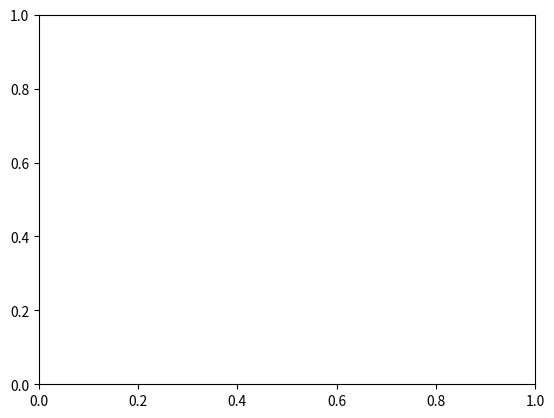

In [103]:
sns.lineplot(test[test['product_name'].str.contains('SLOVAK')].groupby('date',as_index=False)['quantity'].sum().set_index('date'))

In [104]:
test[test['product_name'].str.contains('EASTER')]

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,canceled_quantity,canceled,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,Unnamed: 0,stock_type,category
6082,539993,22808,SET OF 6 T-LIGHTS EASTER CHICKS,12,2021-01-04,2.95,E13313,35.40,0.0,0.0,Honolulu,HI,339,156,small,sightseeing,other,14,consignment,Easter
6083,546418,22808,SET OF 6 T-LIGHTS EASTER CHICKS,3,2021-03-13,2.95,E17315,8.85,0.0,0.0,New York,NY,8177,778,big,metro,east,14,consignment,Easter
6084,550828,22808,SET OF 6 T-LIGHTS EASTER CHICKS,1,2021-04-21,2.95,E17315,2.95,0.0,0.0,New York,NY,8177,778,big,metro,east,14,consignment,Easter
6085,546261,22808,SET OF 6 T-LIGHTS EASTER CHICKS,1,2021-03-10,2.95,E17841,2.95,0.0,0.0,New York,NY,8177,778,big,metro,east,14,consignment,Easter
6086,540482,22808,SET OF 6 T-LIGHTS EASTER CHICKS,6,2021-01-07,2.95,E14672,17.70,0.0,0.0,San Antonio,TX,1598,1291,middle,other,south,14,consignment,Easter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229402,543921,35909B,PINK FLOWERS RABBIT EASTER,6,2021-02-14,2.95,E13911,17.70,0.0,0.0,Houston,TX,2325,1658,middle,other,south,2253,buying,Easter
229403,556784,35909B,PINK FLOWERS RABBIT EASTER,2,2021-06-14,2.95,E14461,5.90,0.0,0.0,Las Vegas,NV,675,367,small,sightseeing,west,2253,buying,Easter
229404,656784,35909B,PINK FLOWERS RABBIT EASTER,2,2021-12-10,2.95,E14461,5.90,0.0,0.0,Las Vegas,NV,675,367,small,sightseeing,west,2253,buying,Easter
229405,574672,35910B,PINK FLOWERS RABBIT EASTER,1,2021-11-06,1.95,E13532,1.95,0.0,0.0,Los Angeles,CA,3985,1216,middle,metro,west,2253,buying,Easter


<AxesSubplot: >

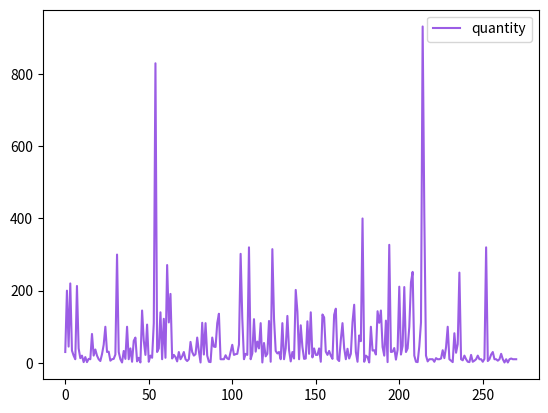

In [105]:
test[test['product_name']=='JUMBO BAG PINK POLKADOT'].sort_values(by = 'date').groupby('date',as_index = False)['quantity'].sum()
sns.lineplot(test[test['product_name']=='JUMBO BAG PINK POLKADOT'].sort_values(by = 'date').groupby('date',as_index = False)['quantity'].sum())

In [106]:
bag = test[test['product_name']=='JUMBO BAG PINK POLKADOT'].sort_values(by = 'date').groupby('date',as_index = False)['quantity'].sum()
bag.index = pd.DatetimeIndex(bag.index)

In [107]:
bag.set_index('date')

,quantity
date,
2021-01-04,30
2021-01-05,200
2021-01-06,45
2021-01-07,220
2021-01-09,34
...,...
2021-12-22,10
2021-12-24,12
2021-12-25,10


In [129]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [118]:
bag['date'] = pd.to_datetime(bag['date'])
bag.set_index('date',inplace=True)

In [180]:
temp = test[test['product_name']=='JUMBO BAG PINK POLKADOT'].sort_values(by = 'date').groupby('date',as_index = False)['quantity'].sum()

In [181]:
idx = pd.date_range('01-04-2021', '12-27-2021')
temp.index = pd.DatetimeIndex(temp.index)

temp = temp.reindex(idx, fill_value=0)
temp

,date,quantity
2021-01-04,0,0
2021-01-05,0,0
2021-01-06,0,0
2021-01-07,0,0
2021-01-08,0,0
...,...,...
2021-12-23,0,0
2021-12-24,0,0
2021-12-25,0,0
2021-12-26,0,0


In [182]:
result = seasonal_decompose(bag, model = 'additive', period = 12)
bag

,quantity
date,
2021-01-04,30
2021-01-05,200
2021-01-06,45
2021-01-07,220
2021-01-09,34
...,...
2021-12-22,10
2021-12-24,12
2021-12-25,10


(array([18659., 18687., 18718., 18748., 18779., 18809., 18840., 18871.,
        18901., 18932., 18962.]),
 [Text(18659.0, 0, '2021-02'),
  Text(18687.0, 0, '2021-03'),
  Text(18718.0, 0, '2021-04'),
  Text(18748.0, 0, '2021-05'),
  Text(18779.0, 0, '2021-06'),
  Text(18809.0, 0, '2021-07'),
  Text(18840.0, 0, '2021-08'),
  Text(18871.0, 0, '2021-09'),
  Text(18901.0, 0, '2021-10'),
  Text(18932.0, 0, '2021-11'),
  Text(18962.0, 0, '2021-12')])

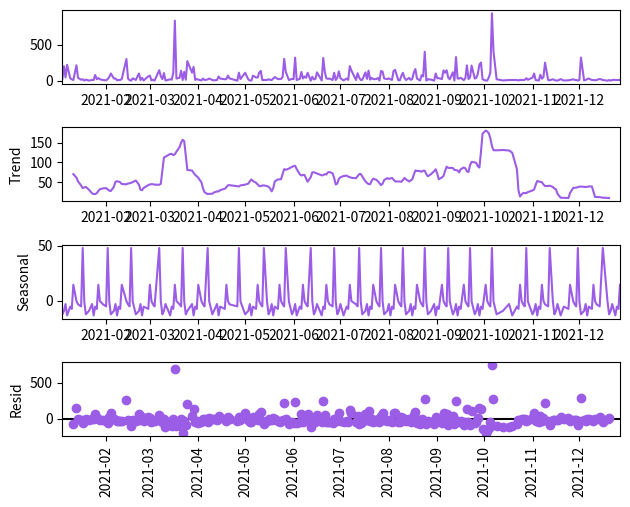

In [183]:
result.plot()
plt.xticks(rotation = 90)

In [184]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
from tqdm import tqdm

In [185]:
ts =sm.tsa.ARIMA(temp['quantity'], order=(1,2,0)).fit()

In [186]:
ts.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               quantity   No. Observations:                  358
Model:                 ARIMA(1, 2, 0)   Log Likelihood                4052.887
Date:                Thu, 17 Nov 2022   AIC                          -8101.775
Time:                        10:46:01   BIC                          -8094.025
Sample:                    01-04-2021   HQIC                         -8098.692
                         - 12-27-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1              -0   3.88e-19         -0      1.000   -7.61e-19    7.61e-19
sigma2       1.93e-11   1.02e-10      0.190      0.849    -1.8e-10    2.18e-10
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.43e+24. Standard errors may be unstable.
"""

In [187]:
def MAPEval(y_pred, y_true):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPEval(ts.predict(temp['date']), temp['quantity'])

TypeError: Cannot convert input [2021-01-04    0
2021-01-05    0
2021-01-06    0
2021-01-07    0
2021-01-08    0
             ..
2021-12-23    0
2021-12-24    0
2021-12-25    0
2021-12-26    0
2021-12-27    0
Freq: D, Name: date, Length: 358, dtype: object] of type <class 'pandas.core.series.Series'> to Timestamp

In [193]:
sales = read_csv('01_sales_data2.csv')
sales['canceled'] = np.NaN

In [195]:
sales.loc[sales['quantity'] < 0,'canceled'] = 1
sales.loc[sales['quantity'] > 0 ,'canceled'] = 0

In [197]:
sales['date'] = pd.to_datetime(sales['date'])

In [198]:
sales['month'] = sales['date'].apply(lambda x : x.month)

In [200]:
canceled = sales.groupby('month',as_index = False)['canceled'].sum()

In [201]:
count = sales.groupby('month', as_index = False)['invoice'].count()

In [202]:
count

,month,invoice
0,1,18497
1,2,17886
2,3,24283
3,4,21148
4,5,25494
5,6,24039
6,7,23930
7,8,23412
8,9,35973
9,10,20392


In [203]:
canceled

,month,canceled
0,1,576.0
1,2,347.0
2,3,572.0
3,4,491.0
4,5,535.0
5,6,581.0
6,7,570.0
7,8,517.0
8,9,693.0
9,10,402.0


In [208]:
product = read_csv('')

,Unnamed: 0,product_name,stock_type,category
0,0,JUMBO BAG PINK POLKADOT,consignment,"Bags, Luggage & Accessories"
1,1,BLUE POLKADOT WRAP,consignment,Home & Garden
2,2,RED RETROSPOT WRAP,consignment,Home & Garden
3,3,RECYCLING BAG RETROSPOT,consignment,"Bags, Luggage & Accessories"
4,4,RED RETROSPOT SHOPPER BAG,consignment,"Bags, Luggage & Accessories"
...,...,...,...,...
2755,3686,SNACK TRAY RED GINGHAM,consignment,Home & Garden
2756,3687,SNACK TRAY HAPPY FOREST,consignment,Home & Garden
2757,3688,SET OF 6 RIBBONS COUNTRY STYLE,consignment,Home & Garden
2758,3705,PACK 3 BOXES CHRISTMAS PANETTONE,consignment,Christmas


In [205]:
canceled['ratio'] = canceled['canceled'] / count['invoice']

In [206]:
canceled

,month,canceled,ratio
0,1,576.0,0.031140
1,2,347.0,0.019401
2,3,572.0,0.023556
3,4,491.0,0.023217
4,5,535.0,0.020985
5,6,581.0,0.024169
6,7,570.0,0.023819
7,8,517.0,0.022083
8,9,693.0,0.019264
9,10,402.0,0.019714


In [207]:
sales = pd.merge(sales, read_csv('category.csv'))

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,canceled,month
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.50,0.0,1
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.50,0.0,1
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.50,0.0,1
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.50,0.0,1
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.50,0.0,1
...,...,...,...,...,...,...,...,...,...,...
282637,681452,21181,PLEASE ONE PERSON METAL SIGN,36,2021-12-23,2.10,E17675,75.60,0.0,12
282638,681452,22075,6 RIBBONS ELEGANT CHRISTMAS,24,2021-12-29,0.39,E17675,9.36,0.0,12
282639,681452,22086,PAPER CHAIN KIT 50'S CHRISTMAS,40,2021-12-25,2.55,E17675,102.00,0.0,12
282640,681452,22191,IVORY DINER WALL CLOCK,2,2021-12-21,8.50,E17675,17.00,0.0,12
